In [1]:
#data processing
import pandas as pd
#linear algebra
import numpy as np
#data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
###import dash
####import dash_core_components as dcc
###import dash_html_components as html
###import squarify
from matplotlib import pyplot as plot

In [2]:
data =pd.read_csv('globalterrorismdb_0522dist(1).csv', encoding='latin-1')
df = pd.DataFrame(data)
print("Data has imported")
data.head() 

C:\Users\corna\AppData\Local\Temp\ipykernel_20468\692180591.py:1: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('globalterrorismdb_0522dist(1).csv', encoding='latin-1')


Data has imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Before Cleaning and processing, visualise the data base and here we derived extrapolated, the most terrorism attacked country for every 10 years. To get the result need it from the data, after exploration and analyse the context driven to just 4 features eventid, iyear, country, country_txt.

In [3]:
df1= df.filter(['eventid', 'iyear','country','country_txt'], axis=1)

In [4]:
df1


,eventid,iyear,country,country_txt
0,197000000001,1970,58,Dominican Republic
1,197000000002,1970,130,Mexico
2,197001000001,1970,160,Philippines
3,197001000002,1970,78,Greece
4,197001000003,1970,101,Japan
...,...,...,...,...
209701,202012310015,2020,228,Yemen
209702,202012310016,2020,228,Yemen
209703,202012310017,2020,75,Germany
209704,202012310018,2020,4,Afghanistan


# Which is the most terrorism affected country each decade

Use the original database.Generate the column decade (10 years), customs value from the column ‘iyear’ and stretches for every 10 years.  after that represent the data for the new database

In [5]:
decade=[]
for row in df['iyear']:
    if row < 1980: decade.append('1970s')
    elif row< 1990: decade.append('1980s')
    elif row< 2000: decade.append('1990s')
    elif row< 2010: decade.append('2000s')
    else: decade.append('2020s')
    
 
    

In [6]:
df1['decade'] = decade


In [7]:
df1['decade'].value_counts()

2020s    114815
1980s     31156
1990s     28765
2000s     25057
1970s      9913
Name: decade, dtype: int64

In [8]:
df1



,eventid,iyear,country,country_txt,decade
0,197000000001,1970,58,Dominican Republic,1970s
1,197000000002,1970,130,Mexico,1970s
2,197001000001,1970,160,Philippines,1970s
3,197001000002,1970,78,Greece,1970s
4,197001000003,1970,101,Japan,1970s
...,...,...,...,...,...
209701,202012310015,2020,228,Yemen,2020s
209702,202012310016,2020,228,Yemen,2020s
209703,202012310017,2020,75,Germany,2020s
209704,202012310018,2020,4,Afghanistan,2020s


In [9]:
df70=df1[df1['decade'] >='1970s']
df701=df70.groupby('country_txt').count()
.sort_values('decade', ascending=False).head(20)
df701

,eventid,iyear,country,decade
country_txt,,,,
Iraq,27521,27521,27521,27521
Afghanistan,18920,18920,18920,18920
Pakistan,15504,15504,15504,15504
India,13929,13929,13929,13929
Colombia,8915,8915,8915,8915
Philippines,8271,8271,8271,8271
Peru,6111,6111,6111,6111
Yemen,6027,6027,6027,6027
Nigeria,5550,5550,5550,5550


In [10]:
df70=df1[df1['decade'] >='1980s']
df701=df70.groupby('country_txt').count()
.sort_values('decade', ascending=False).head(20)
df701

,eventid,iyear,country,decade
country_txt,,,,
Iraq,27515,27515,27515,27515
Afghanistan,18916,18916,18916,18916
Pakistan,15487,15487,15487,15487
India,13905,13905,13905,13905
Colombia,8496,8496,8496,8496
Philippines,8147,8147,8147,8147
Peru,6092,6092,6092,6092
Yemen,6027,6027,6027,6027
Nigeria,5549,5549,5549,5549


In [11]:
df70=df1[df1['decade'] >='1990s']
df701=df70.groupby('country_txt').count().sort_values
('decade', ascending=False).head(20)
df701

,eventid,iyear,country,decade
country_txt,,,,
Iraq,27485,27485,27485,27485
Afghanistan,18894,18894,18894,18894
Pakistan,15291,15291,15291,15291
India,12677,12677,12677,12677
Philippines,7229,7229,7229,7229
Yemen,6027,6027,6027,6027
Colombia,5545,5545,5545,5545
Nigeria,5543,5543,5543,5543
Somalia,5299,5299,5299,5299


In [12]:
df70=df1[df1['decade'] >='2000s']
df701=df70.groupby('country_txt').count().sort_values
('decade', ascending=False).head(20)
df701

,eventid,iyear,country,decade
country_txt,,,,
Iraq,27360,27360,27360,27360
Afghanistan,18796,18796,18796,18796
Pakistan,13687,13687,13687,13687
India,10887,10887,10887,10887
Philippines,6283,6283,6283,6283
Yemen,5920,5920,5920,5920
Nigeria,5469,5469,5469,5469
Somalia,5148,5148,5148,5148
Thailand,3975,3975,3975,3975


In [13]:
df70=df1[df1['decade'] >='2010s']
df701=df70.groupby('country_txt').count().sort_values
('decade', ascending=False).head(20)
df701

,eventid,iyear,country,decade
country_txt,,,,
Iraq,22174,22174,22174,22174
Afghanistan,16845,16845,16845,16845
Pakistan,11707,11707,11707,11707
India,8315,8315,8315,8315
Yemen,5825,5825,5825,5825
Philippines,5262,5262,5262,5262
Nigeria,5212,5212,5212,5212
Somalia,4663,4663,4663,4663
Syria,2848,2848,2848,2848


In [14]:
df70=df1[df1['decade'] >='2020s']
df701=df70.groupby('country_txt').count().sort_values
('decade', ascending=False).head(20)
df701

,eventid,iyear,country,decade
country_txt,,,,
Iraq,22174,22174,22174,22174
Afghanistan,16845,16845,16845,16845
Pakistan,11707,11707,11707,11707
India,8315,8315,8315,8315
Yemen,5825,5825,5825,5825
Philippines,5262,5262,5262,5262
Nigeria,5212,5212,5212,5212
Somalia,4663,4663,4663,4663
Syria,2848,2848,2848,2848


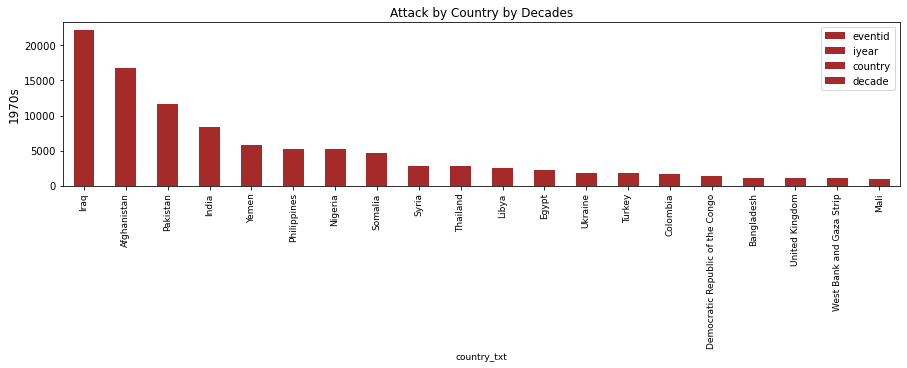

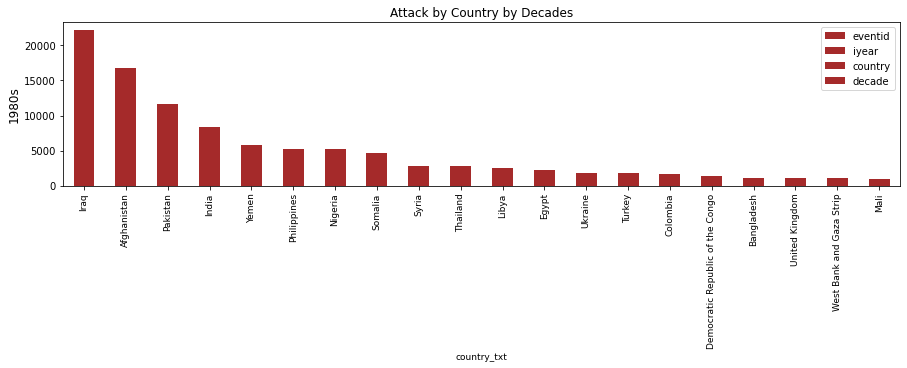

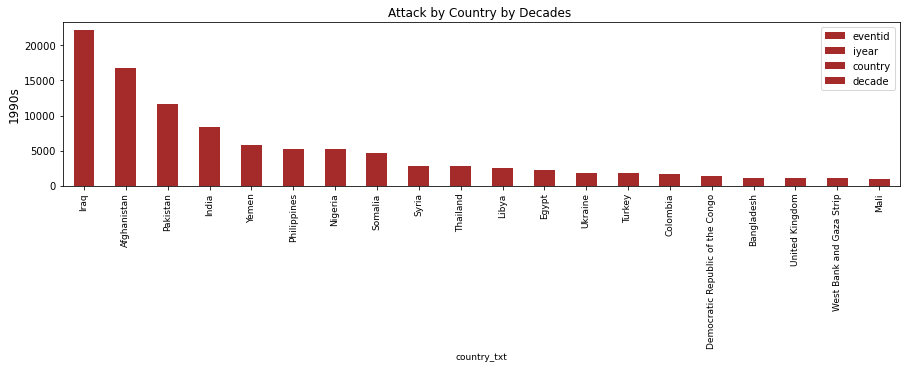

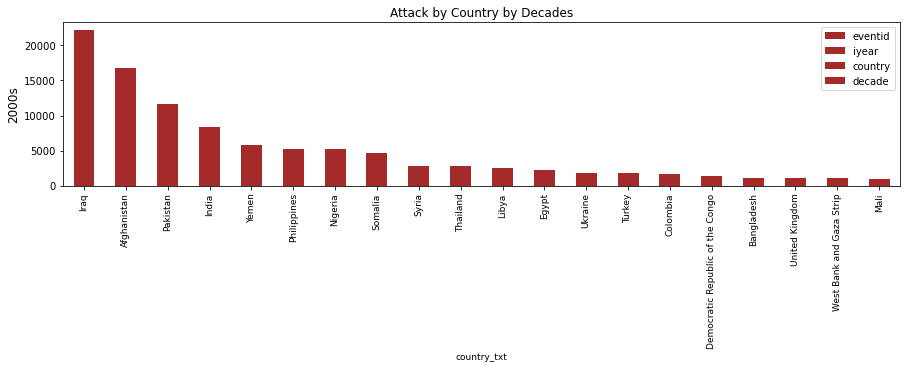

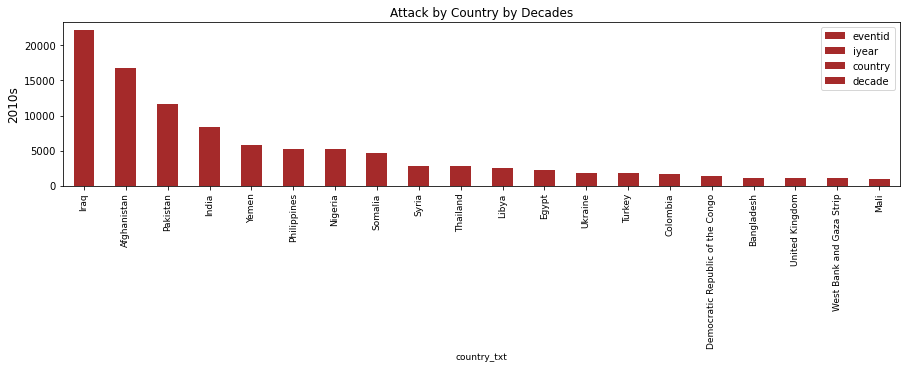

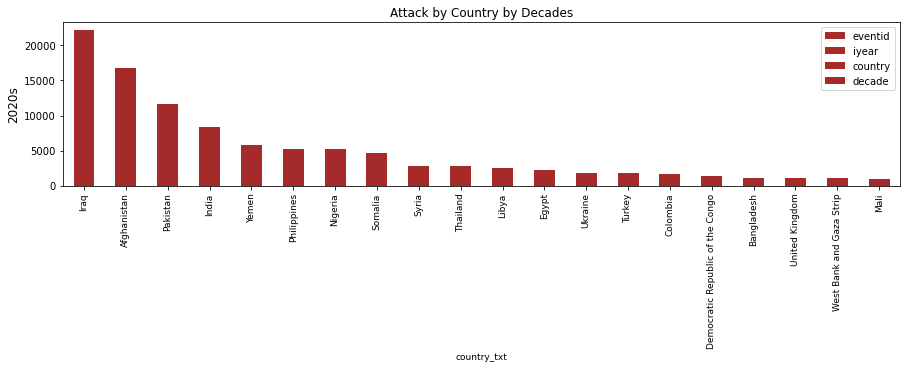

In [15]:
df701.plot(kind="bar", color="brown", figsize=(15,3))
plt.title("Attack by Country by Decades")

plt.xlabel("country_txt", fontsize =9)
plt.xticks(fontsize=9)
plt.ylabel("1970s", fontsize=12)

df701.plot(kind="bar", color="brown", figsize=(15,3))
plt.title("Attack by Country by Decades")
plt.xlabel("country_txt", fontsize =9)
plt.xticks(fontsize=9)
plt.ylabel("1980s", fontsize=12)

df701.plot(kind="bar", color="brown", figsize=(15,3))
plt.title("Attack by Country by Decades ")
plt.xlabel("country_txt", fontsize =9)
plt.xticks(fontsize=9)
plt.ylabel("1990s", fontsize=12)

df701.plot(kind="bar", color="brown", figsize=(15,3))
plt.title("Attack by Country by Decades")
plt.xlabel("country_txt", fontsize =9)
plt.xticks(fontsize=9)
plt.ylabel("2000s", fontsize=12)

df701.plot(kind="bar", color="brown", figsize=(15,3))
plt.title("Attack by Country by Decades")
plt.xlabel("country_txt", fontsize =9)
plt.xticks(fontsize=9)
plt.ylabel("2010s", fontsize=12)

df701.plot(kind="bar", color="brown", figsize=(15,3))
plt.title("Attack by Country by Decades")
plt.xlabel("country_txt", fontsize =9)
plt.xticks(fontsize=9)
plt.ylabel("2020s", fontsize=12)
plt.show()




# The most popular target type assassinated

In [16]:
df2 = df.filter(['eventid', 'attacktype1_txt', 'targtype1_txt','targsubtype1_txt','targtype1'], axis=1)
df2

,eventid,attacktype1_txt,targtype1_txt,targsubtype1_txt,targtype1
0,197000000001,Assassination,Private Citizens & Property,Named Civilian,14
1,197000000002,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",7
2,197001000001,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,10
3,197001000002,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,7
4,197001000003,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,7
...,...,...,...,...,...
209701,202012310015,Bombing/Explosion,Private Citizens & Property,House/Apartment/Residence,14
209702,202012310016,Bombing/Explosion,Private Citizens & Property,House/Apartment/Residence,14
209703,202012310017,Facility/Infrastructure Attack,Military,Military Transportation/Vehicle (excluding con...,4
209704,202012310018,Armed Assault,Private Citizens & Property,Protester,14


drop all unwanted data cause by NAN and null

In [17]:
df2a = df2.dropna(subset=['targsubtype1_txt'])
df2a.head(7)

,eventid,attacktype1_txt,targtype1_txt,targsubtype1_txt,targtype1
0,197000000001,Assassination,Private Citizens & Property,Named Civilian,14
1,197000000002,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",7
2,197001000001,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,10
3,197001000002,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,7
4,197001000003,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,7
5,197001010002,Armed Assault,Police,"Police Building (headquarters, station, school)",3
6,197001020001,Assassination,Police,Police Security Forces/Officers,3


since the data......................

In [18]:
pd.set_option('display.max_rows', 150)

In [19]:
df2a['targsubtype1_txt'].value_counts()

Unnamed Civilian/Unspecified                                               13552
Police Security Forces/Officers                                            12571
Military Personnel (soldiers, troops, officers, forces)                     9983
Military Unit/Patrol/Convoy                                                 9196
Village/City/Town/Suburb                                                    8662
Government Personnel (excluding police, military)                           7294
Politician or Political Party Movement/Meeting/Rally                        7192
Police Building (headquarters, station, school)                             7190
Military Barracks/Base/Headquarters/Checkpost                               7040
Police Patrol (including vehicles and convoys)                              5878
Government Building/Facility/Office                                         5163
Retail/Grocery/Bakery                                                       4539
Electricity                 

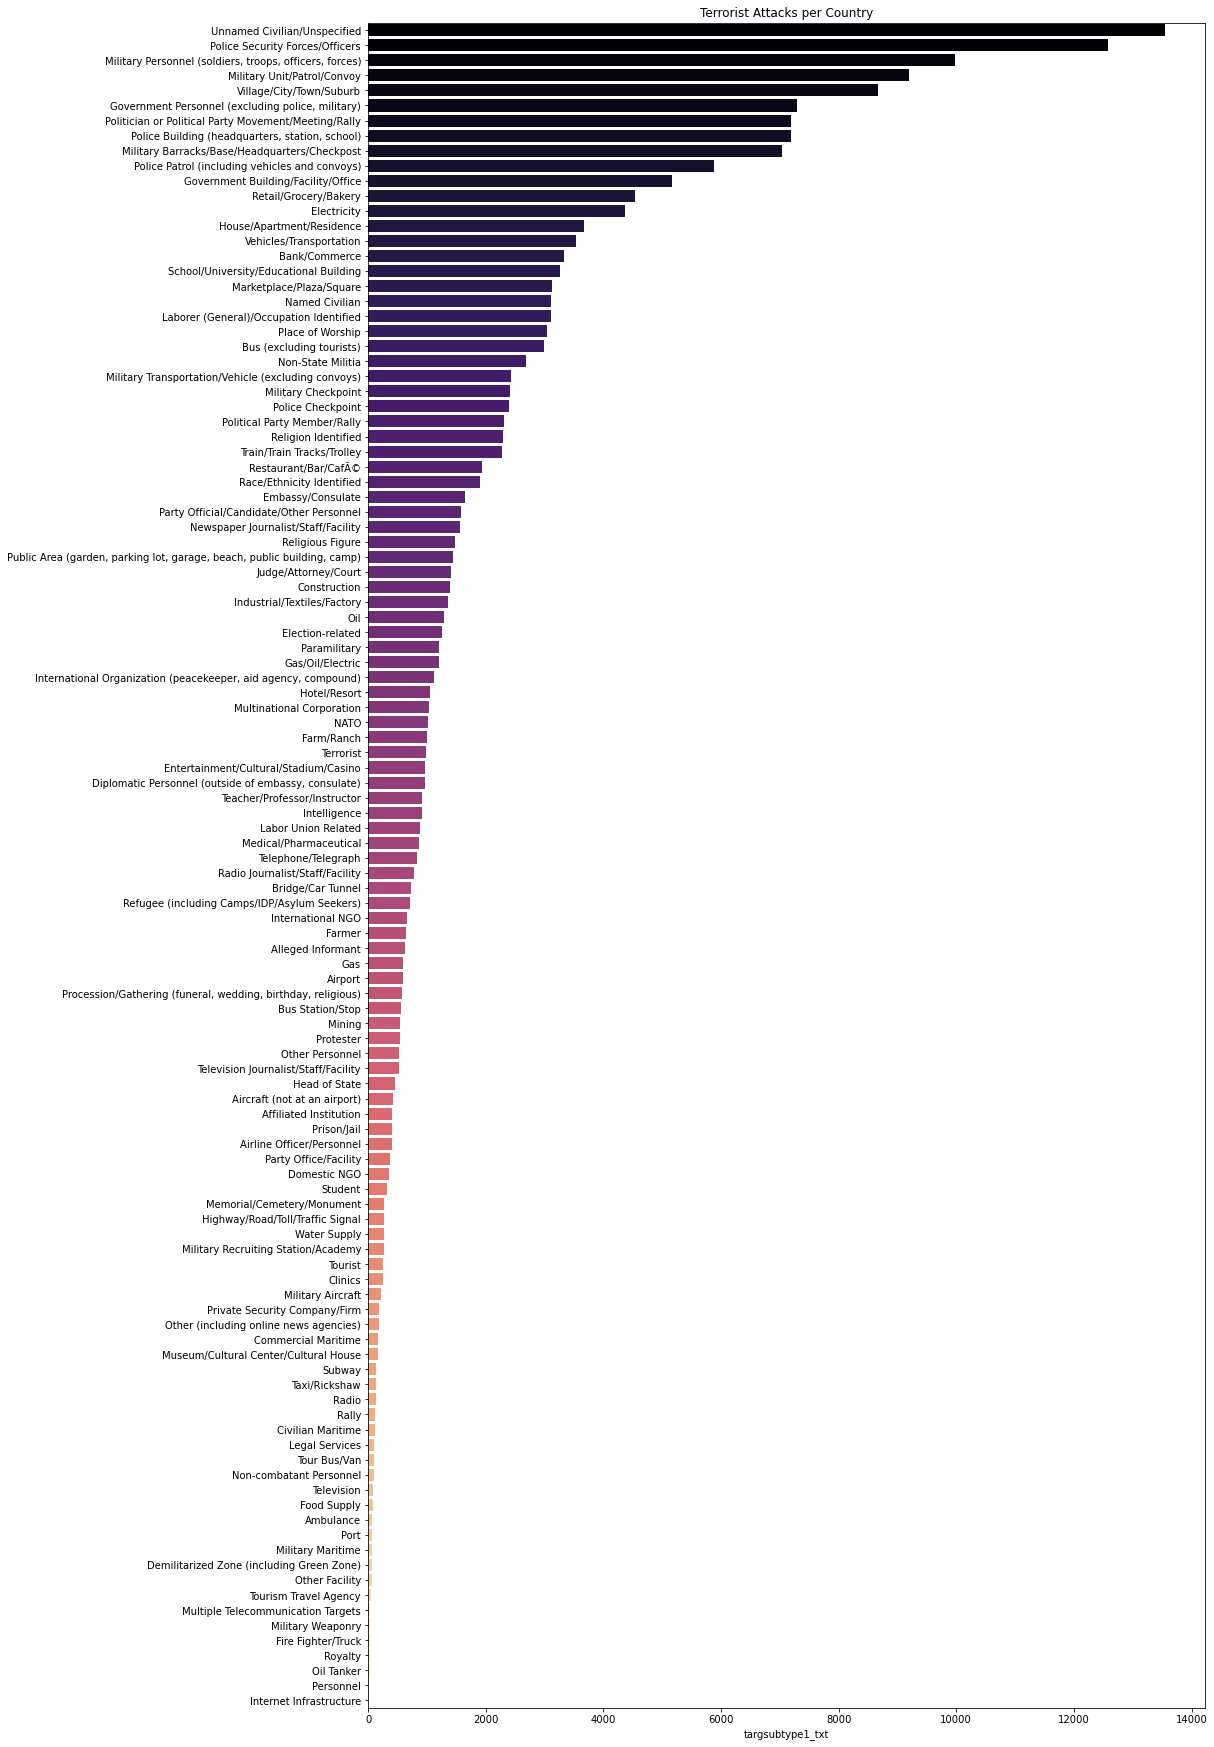

In [21]:
Fig,axe = plt.subplots(figsize=(15,31))
sns.barplot(x=data['targsubtype1_txt'].value_counts(),
            y = data['targsubtype1_txt'].value_counts()[:].index, ax=axe,palette = 'magma');
axe.set_title('Terrorist Attribute')
plt.show()

# Most active terrorist group’s activity across the year, weapon used, and kills caused by it.

In [22]:
df3 = data.filter(['eventid','gname','weapsubtype1_txt','nkill'], axis=1)
df3

,eventid,gname,weapsubtype1_txt,nkill
0,197000000001,MANO-D,NaN,1.0
1,197000000002,23rd of September Communist League,NaN,0.0
2,197001000001,Unknown,NaN,1.0
3,197001000002,Unknown,Unknown Explosive Type,NaN
4,197001000003,Unknown,NaN,NaN
...,...,...,...,...
209701,202012310015,Houthi extremists (Ansar Allah),"Projectile (rockets, mortars, RPGs, etc.)",NaN
209702,202012310016,Houthi extremists (Ansar Allah),Landmine,NaN
209703,202012310017,Left-wing extremists,Arson/Fire,0.0
209704,202012310018,Unknown,Unknown Gun Type,1.0


drop the null value from data

In [23]:
df3

,eventid,gname,weapsubtype1_txt,nkill
0,197000000001,MANO-D,NaN,1.0
1,197000000002,23rd of September Communist League,NaN,0.0
2,197001000001,Unknown,NaN,1.0
3,197001000002,Unknown,Unknown Explosive Type,NaN
4,197001000003,Unknown,NaN,NaN
...,...,...,...,...
209701,202012310015,Houthi extremists (Ansar Allah),"Projectile (rockets, mortars, RPGs, etc.)",NaN
209702,202012310016,Houthi extremists (Ansar Allah),Landmine,NaN
209703,202012310017,Left-wing extremists,Arson/Fire,0.0
209704,202012310018,Unknown,Unknown Gun Type,1.0


In [24]:
df3= df3.dropna()
df3

,eventid,gname,weapsubtype1_txt,nkill
5,197001010002,Black Nationalists,Unknown Gun Type,0.0
6,197001020001,Tupamaros (Uruguay),Automatic or Semi-Automatic Rifle,0.0
7,197001020002,Unknown,Unknown Explosive Type,0.0
8,197001020003,New Year's Gang,Molotov Cocktail/Petrol Bomb,0.0
9,197001030001,New Year's Gang,Gasoline or Alcohol,0.0
...,...,...,...,...
209699,202012310013,Unknown,Unknown Explosive Type,0.0
209700,202012310014,Unknown,Gasoline or Alcohol,0.0
209703,202012310017,Left-wing extremists,Arson/Fire,0.0
209704,202012310018,Unknown,Unknown Gun Type,1.0


filter the unknwon data

In [25]:
df3= df3[df3.gname != "Unknown"]
df3

,eventid,gname,weapsubtype1_txt,nkill
5,197001010002,Black Nationalists,Unknown Gun Type,0.0
6,197001020001,Tupamaros (Uruguay),Automatic or Semi-Automatic Rifle,0.0
8,197001020003,New Year's Gang,Molotov Cocktail/Petrol Bomb,0.0
9,197001030001,New Year's Gang,Gasoline or Alcohol,0.0
10,197001050001,"Weather Underground, Weathermen",Unknown Explosive Type,0.0
...,...,...,...,...
209690,202012310003,Taliban,Landmine,1.0
209692,202012310005,The Resistance Front (TRF),Unknown Gun Type,1.0
209695,202012310008,Patriotic Resistance Front in Ituri (FRPI),Unknown Gun Type,0.0
209698,202012310012,Allied Democratic Forces (ADF),Arson/Fire,25.0


Count Group has most number of attack

In [26]:
df3a = df3
df3a['gname'].value_counts()

Taliban                                        8105
Islamic State of Iraq and the Levant (ISIL)    5473
Shining Path (SL)                              3671
Al-Shabaab                                     3116
New People's Army (NPA)                        2917
                                               ... 
Red Patriots Group                                1
Basque Refugee Support Group                      1
Anti-Socials                                      1
Former Soldiers/Police                            1
Martyr Karim Daraam Brigade                       1
Name: gname, Length: 3147, dtype: int64

Data have to many entreys, what is not good in visualisasion. We concentred on data have more then one thusand 

to get the sum for all other value

In [32]:
df3Tal = df[:]
df3TalKill= df3Tal.filter(['weapsubtype1_txt','nkill'],axis=1)

In [33]:
df3TK=df3TalKill.groupby('weapsubtype1_txt').sum().sort_values
('nkill',ascending=False).reset_index()
df3TK

,weapsubtype1_txt,nkill
0,Unknown Gun Type,107893.0
1,Automatic or Semi-Automatic Rifle,80739.0
2,Vehicle,61970.0
3,Unknown Explosive Type,40898.0
4,Suicide (carried bodily by human being),32381.0
5,"Projectile (rockets, mortars, RPGs, etc.)",29163.0
6,Landmine,12064.0
7,Knife or Other Sharp Object,11570.0
8,Handgun,8184.0
9,Grenade,6365.0


In [34]:
sumOthers = df3TK.iloc[6:24]
sumOthers.nkill.sum()

59275.0

# Economical loss of each decade and its comparison based on criticality of the attack

Decade variable like we did in point above. This is 
how our data looks after adding decade 

In [35]:
df4 = df.filter(['eventid','iyear', 'country_txt', 'propvalue', 'crit1'], axis=1)

In [36]:
 df4

,eventid,iyear,country_txt,propvalue,crit1
0,197000000001,1970,Dominican Republic,NaN,1
1,197000000002,1970,Mexico,NaN,1
2,197001000001,1970,Philippines,NaN,1
3,197001000002,1970,Greece,NaN,1
4,197001000003,1970,Japan,NaN,1
...,...,...,...,...,...
209701,202012310015,2020,Yemen,-99.0,1
209702,202012310016,2020,Yemen,NaN,1
209703,202012310017,2020,Germany,-99.0,1
209704,202012310018,2020,Afghanistan,NaN,1


In [37]:
df4a = df4.dropna()
df4a

,eventid,iyear,country_txt,propvalue,crit1
7,197001020002,1970,United States,22500.0,1
8,197001020003,1970,United States,60000.0,1
10,197001050001,1970,United States,0.0,1
11,197001060001,1970,United States,305.0,1
14,197001090002,1970,United States,2000000.0,1
...,...,...,...,...,...
209697,202012310010,2020,Greece,-99.0,1
209699,202012310013,2020,Yemen,-99.0,1
209700,202012310014,2020,Nepal,-99.0,1
209701,202012310015,2020,Yemen,-99.0,1


now propvalue has"-99" has to be remove

In [38]:
df4a = df4[df4.propvalue != -99]
df4a

,eventid,iyear,country_txt,propvalue,crit1
0,197000000001,1970,Dominican Republic,NaN,1
1,197000000002,1970,Mexico,NaN,1
2,197001000001,1970,Philippines,NaN,1
3,197001000002,1970,Greece,NaN,1
4,197001000003,1970,Japan,NaN,1
...,...,...,...,...,...
209696,202012310009,2020,Iraq,NaN,1
209698,202012310012,2020,Democratic Republic of the Congo,NaN,1
209702,202012310016,2020,Yemen,NaN,1
209704,202012310018,2020,Afghanistan,NaN,1


In [39]:
df4ab=df4a.groupby('iyear').sum().sort_values
('propvalue', ascending=False).reset_index()

In [40]:
df4mod = df4ab.filter(['iyear','propvalue'], axis=1)

In [41]:
df4mod

,iyear,propvalue
0,1992,2.806137e+09
1,1996,1.296775e+09
2,1982,7.482039e+08
3,1995,6.553832e+08
4,2001,3.666540e+08
5,2020,2.644970e+08
6,2016,2.118942e+08
7,1991,1.874643e+08
8,1989,1.646855e+08
9,1980,1.581276e+08


# Regression to see success of terrorist attack

 Determine success rate of the terrorist attacks in various countries.
First, we create dummies to perform Random Forest Regression - Logistic Regression

5

In [42]:
df5 = data.filter(['success','attacktype1',
                   'targtype1_txt','nkill'], axis=1)

In [43]:
df5

,success,attacktype1,targtype1_txt,nkill
0,1,1,Private Citizens & Property,1.0
1,1,6,Government (Diplomatic),0.0
2,1,1,Journalists & Media,1.0
3,1,3,Government (Diplomatic),NaN
4,1,7,Government (Diplomatic),NaN
...,...,...,...,...
209701,1,3,Private Citizens & Property,NaN
209702,1,3,Private Citizens & Property,NaN
209703,1,7,Military,0.0
209704,1,2,Private Citizens & Property,1.0


In [44]:
df5=df5.dropna()
df5

,success,attacktype1,targtype1_txt,nkill
0,1,1,Private Citizens & Property,1.0
1,1,6,Government (Diplomatic),0.0
2,1,1,Journalists & Media,1.0
5,1,2,Police,0.0
6,0,1,Police,0.0
...,...,...,...,...
209699,1,3,NGO,0.0
209700,1,7,Government (General),0.0
209703,1,7,Military,0.0
209704,1,2,Private Citizens & Property,1.0


In [197]:
df5['success'].plot
plt.show()

In [48]:
df5reg = pd.get_dummies(df5[['success','attacktype1','targtype1_txt','nkill']], drop_first =True)

In [49]:
df5reg

,success,attacktype1,nkill,targtype1_txt_Airports & Aircraft,targtype1_txt_Business,targtype1_txt_Educational Institution,targtype1_txt_Food or Water Supply,targtype1_txt_Government (Diplomatic),targtype1_txt_Government (General),targtype1_txt_Journalists & Media,...,targtype1_txt_Police,targtype1_txt_Private Citizens & Property,targtype1_txt_Religious Figures/Institutions,targtype1_txt_Telecommunication,targtype1_txt_Terrorists/Non-State Militia,targtype1_txt_Tourists,targtype1_txt_Transportation,targtype1_txt_Unknown,targtype1_txt_Utilities,targtype1_txt_Violent Political Party
0,1,1,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,6,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,2,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209699,1,3,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209700,1,7,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
209703,1,7,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209704,1,2,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


After performing the regression, the coefficients and intercepts can be seen as below 

In [10]:
import pandas as pd
data =pd.read_csv('globalterrorismdb_0522dist(1).csv', encoding='latin-1')
df5 = data.filter(['success','attacktype1',
                   'targtype1_txt','nkill'], axis=1)
df5reg = pd.get_dummies(df5[['success','attacktype1','targtype1_txt','nkill']], drop_first =True)
print (df5reg ['y'].value_counts())
print (df5reg. y.value_counts() /len(df5reg))

C:\Users\corna\AppData\Local\Temp\ipykernel_11056\1708192510.py:2: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('globalterrorismdb_0522dist(1).csv', encoding='latin-1')


KeyError: 'x'

 calculate the odd ratio to further understand dependency of each variables on 
success

In [138]:
import statsmodels.formula.api as smf
dflr = data
model = smf.logit('success ~ iyear + propvalue + nkill +country + crit1 + crit2 + crit3' , data = dflr).fit()

print(model.summary() )

Optimization terminated successfully.
         Current function value: 0.152410
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                45866
Model:                          Logit   Df Residuals:                    45858
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 Sep 2022   Pseudo R-squ.:                 0.03799
Time:                        03:51:51   Log-Likelihood:                -6990.5
converged:                       True   LL-Null:                       -7266.5
Covariance Type:            nonrobust   LLR p-value:                4.970e-115
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0589      5.439      2.217      0.027       1.399      22.719
iyear         -0.0050      0

In [199]:
odds_ratio = np.exp(model.params)


AttributeError: 'GaussianNB' object has no attribute 'params'

In [140]:

odds_ratio

Intercept    172628.416995
iyear             0.995031
propvalue         1.000038
nkill             1.181365
country           0.999434
crit1             2.021698
crit2             1.761811
crit3             0.740077
dtype: float64

In [141]:
dflr['crit1*iyear'] = dflr.crit1*dflr.iyear
dflr['crit1*crit2*crit3'] = dflr.crit1*dflr.crit2*dflr.crit3

dflr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,crit1*iyear,crit1*crit2*crit3
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,PGIS,0,0,0,0,NaN,1970,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,PGIS,0,1,1,1,NaN,1970,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1970,1


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg =linear_model.LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor as rft

In [202]:
np.random.seed(62)
X = df5reg.drop('success', axis=1)
y = df5reg['success']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
model =GaussianNB()
model.fit(X_train, y_train);

In [181]:
model.score(X_test, y_test)

0.7059742367380059

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
model = rft()
model.fit(X_train, y_train);

In [193]:
model.score(X_test, y_test)

0.30411296841564117

In [182]:
logmodel = LogisticRegression()

In [183]:
logmodel.fit(X_train, y_train)

C:\Users\corna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [184]:
predictions = logmodel.predict(X_test)

In [191]:
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.coef_, clf.intercept_)

[[ 0.05466816  0.15216226 -0.40791298  0.62588632  0.3696828   0.18255818
  -0.27176298 -0.29960908  0.11593029 -0.19189746 -0.10035262  0.74397506
   0.20085801  0.25064558  0.51827761  0.40124402  0.90088094  0.31040065
   0.49659483  0.15656221 -2.50047069  0.92821759 -0.34351817]] [1.61199979]


C:\Users\corna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
from sklearn.metrics import classification_report

In [186]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.66      0.19      0.30     11799\n           1       0.90      0.99      0.94     86791\n\n    accuracy                           0.89     98590\n   macro avg       0.78      0.59      0.62     98590\nweighted avg       0.87      0.89      0.86     98590\n'

In [187]:
from sklearn.metrics import confusion_matrix

In [188]:
confusion_matrix(y_test,predictions)

array([[ 2253,  9546],
       [ 1153, 85638]], dtype=int64)

In [189]:
from sklearn.metrics import accuracy_score

In [190]:
accuracy_score(y_test,predictions)

0.8914798661121818